# DSCI 100 Project Report: Using Age and Maximum Heart Rate Achieved as a Predictor for Heart Disease. 

#### Beth Koschel, 

## Introduction

**Background:** Heart disease is a term that encompasses several different types of heart conditions(1). The most common condition is know as coronary artery disease (CAD) which can lead to decreased blood flow to the heart resulting in a heart attack (1). As a prominent cause of mortality in Canada, heart disease underscores the significance of investigating factors that may contribute to its development (3).

**Question:** We want to know if age and maximum heart rate achieved might play a role in the presence or absence of heart disease.

**ID and Describe the dataset used:** The dataset we are using to answer this question is heart disease dataset from the Cleveland provided to us through the UC Irvine Machine Learning Repository (3). It contains 14 attributes including age, sex, a chest pain scale, resting blood pressure, serum cholesterol, fasting blood sugar levels, resting electrocardiograph results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by fluoroscopy, and diagnosis of heart disease.

## Methods

To answer our question we will use a knn classifier algorithm. We chose this algorithm because we believe that heart disease is a serious medical condition that requires emergency medical care regardless of severity. We chose the age and maximum heart rate achieved as predictors because previous literature suggests they play a role in the presence of heart disease (1, 2, 3).


### Data Pre-processing
Libraries and processed.cleveland.data dataset were imported from the internet.

Data was cleaned and tidied: New, descriptive column names were assigned. We removed the ? from the dataset by removing the columns with missing information as it was not relevant to our analysis. Additionally we added the column "diagnosis" to the heart_data because the current diagnosis column (num) used a scale of 0 to 4 (Figure 2). Since we wanted to determine whether or not someone has heart disease we considered anyone with a score greater than zero to have heart disease (Figure 3). We then selected all of the columns that had no missing values (Figure 3).

We then split the heart_clean dataset into training and testing data sets (Figure 4). We stratified the data because we want to predict the diagnosis column. We used initial_split to split the dataframe into 75% training data and 25% testing data. Splitting our data this was allowed us to ensure a constant proportion of each class is present in both dataset and allowed us to train our model on as many data points while saving enough data for effective testing later. 


### Exploratory Data Analysis
Created a summary table from the heart training dataset. This summarized the diagnosis, number of patients, the percentage of patients that have heart disease or not, the minimum, mean, and max of each predictor (age and maximum heart rate achieved). We can see from figure Figure 5 that people with heart disease are older and have lower maximum heart rates. 

To further explore age and maximum heart rate (thalach) as predictors we visualized the relationships between age, thalach, and the presence of disease. Figure 6, Figure 7, and Figure 8 illustrate the same relationship present in our summary table: older people and those with lower maximum heart rates are more likely to have heart disease. These trends indicate that age and thalach are good predictors of heart disease.

### Finding the Best K Value
We wanted to find the best value for the k-nearest neighbors and getting the highest accuracy in predictions. To do that we created a classifier and perfomed cross-validation to train the model without using the test dataset (Figure 9, 10, 11, 12, 13).

We then used the recipe function to center and scale the data. We then performed cross-validation using vfold_cv with ten folds, on the training data (Figure 9). We used ten folds to increase the accuracy (Figure 9). Then we created a k-nearest model with neighbours = tune() to find the best value for k-nearest neighbors (Figure 9). We then created a workflow by adding the recipe, model and fit using the tune_grid function (figure 9). The workflow runs cross-validation on a range of nearest neighbors values in gridvals (Figure 9). The best K value was determined through filtering for accuracy and plotting a line graph with the k values on the x-axis and the accuracy estimates on the y-axis (Figure 10). 

### Testing the Classifier
We made a new model specification for the best k value (16) from the previous section (Figure 10). We then reused the recipe made earlier in a workflow, and fit the classifier to our training set. We then used the predict function with testing set to evaluate the classifier's predicition accuracy on data it hadn't seen before (Figure 11, 12). We then made a confusion matrix to determine which diagnoses the classifier was more accurate for and what effects that might have on real world application (Figure 13).

### The Code: 

#### Importing Libraries

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)
library(dplyr) 


# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Importing the Data

The read_csv function was used to import the data (processed.cleveland.data)

In [3]:
# reading the data internet

url  <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- read_csv(url, col_names = FALSE)
     
head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


**Figure 1:** A table of the data imported from data/processed.cleveland.data

#### Cleaning and Tidying the Heart Disease Data

##### Setting the Seed

In [4]:
# setting the seed to 1
set.seed(1)

##### Renaming the Columns

In [5]:
set.seed(1)

# renaming the columns
heart_data <- rename(heart_data,
                    age = X1,
                    sex = X2,
                    cp = X3,
                    trestbps = X4,
                    chol = X5,
                    fbs = X6,
                    restecg = X7,
                    thalach = X8,
                    exang = X9,
                    oldpeak = X10,
                    slope = X11,
                    ca = X12,
                    thal = X13,
                    num = X14)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


**Figure 2:** A table containing the labeled columns from heart_data

##### Removing Columns with "?"

In [20]:
set.seed(1)

# selecting columns 
heart_clean <- heart_data |>
    select(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, num)

##### Adding a New Column 

In [8]:
set.seed(1)

# adding diagnosis column and setting the values to 'TRUE' if the cell value is > 0 or 'FALSE' if the cell value is 0
heart_clean <- heart_clean |>
    mutate(diagnosis = as.factor(ifelse(is.na(num), NA, (num > 0))))
head(heart_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,FALSE


##### Selecting Columns

**Figure 3:** A table containing the cleaned heart_data. 

#### Creating Training and Testing Datasets

In [9]:
set.seed(1)

# splitting dataframe into training and testing datasets
heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

head(heart_training)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0,FALSE
64,1,1,110,211,0,2,144,1,1.8,2,0,FALSE


**Figure 4:** A table containing a sample of the training set taken from heart_clean.

#### Summarizing the Data

In [10]:
# getting the patient, count, percentage, min, max, and mean of each predictor
num_obs <- nrow(heart_training)
heart_summary <- heart_training |> 
    group_by(diagnosis) |>
    summarize(
        num_of_patients = n(),
        percentage = n()/num_obs * 100,
        min_age = min(age),
        max_age = max(age),
        mean_age = mean(age),
        min_thalach = min(thalach),
        max_thalach = max(thalach),
        mean_thalach = mean(thalach)) 

heart_summary

diagnosis,num_of_patients,percentage,min_age,max_age,mean_age,min_thalach,max_thalach,mean_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,124,54.86726,29,76,52.68548,105,202,158.9194
TRUE,102,45.13274,35,77,56.48039,71,195,138.4118


**Figure 5:** A table containing the summarized data from hear_training. This table contains the diagnosis, number of patients, the percentage of patients that have heart disease or not, the minimum, mean, and max of each predictor (age and maximum heart rate achieved)

#### Relationship Visualization 

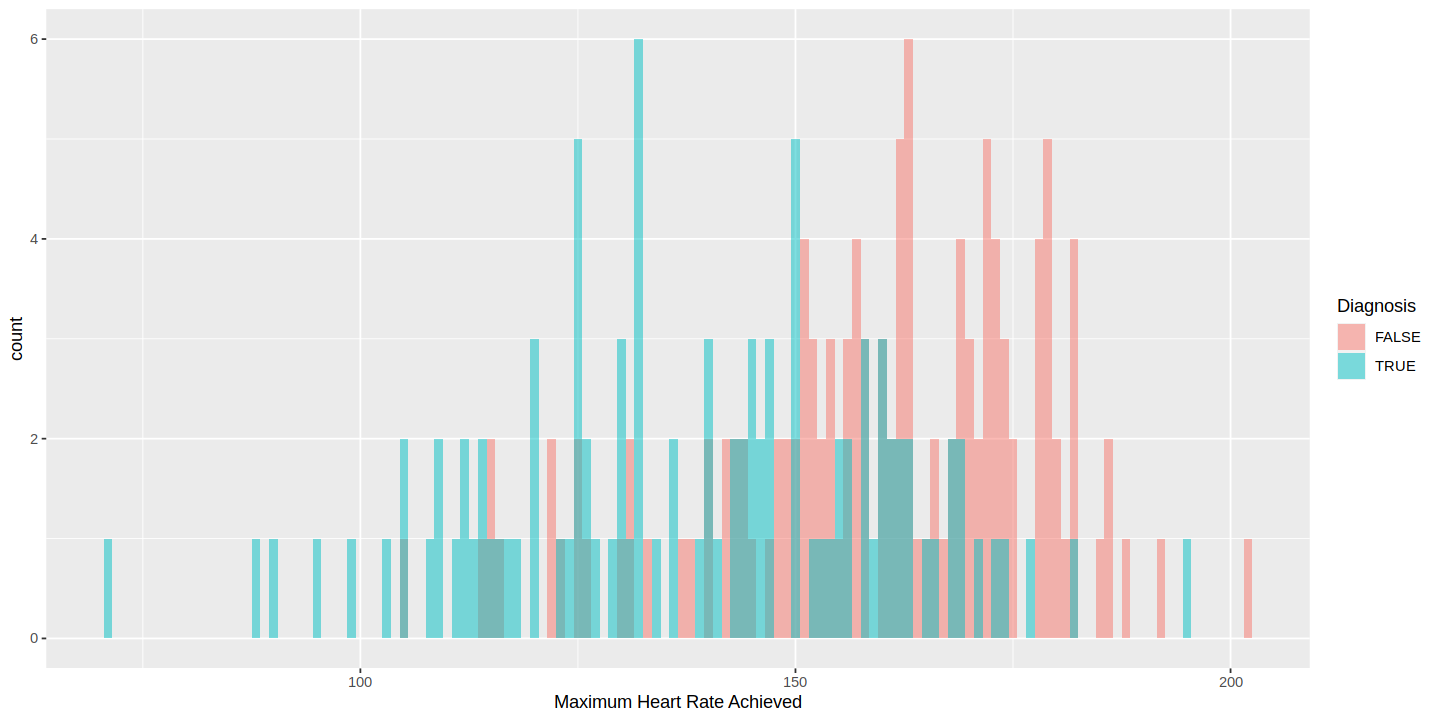

In [11]:
set.seed(1)

#plotting the training data
plot1 <- ggplot(heart_training, aes(x = thalach, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 1) +
    labs(x = "Maximum Heart Rate Achieved", fill = "Diagnosis")
plot1

**Figure 6:** A histogram depicting the number of patients who achieved a maximum heart rate and whether or not they received a heart disease diagnosis. The color blue represents the presence of heart disease and the color red represents no presence of heart disease. Maximum heart rate achieved is on the x-axis (0 to 200) and count on the y-axis (0 to 6).

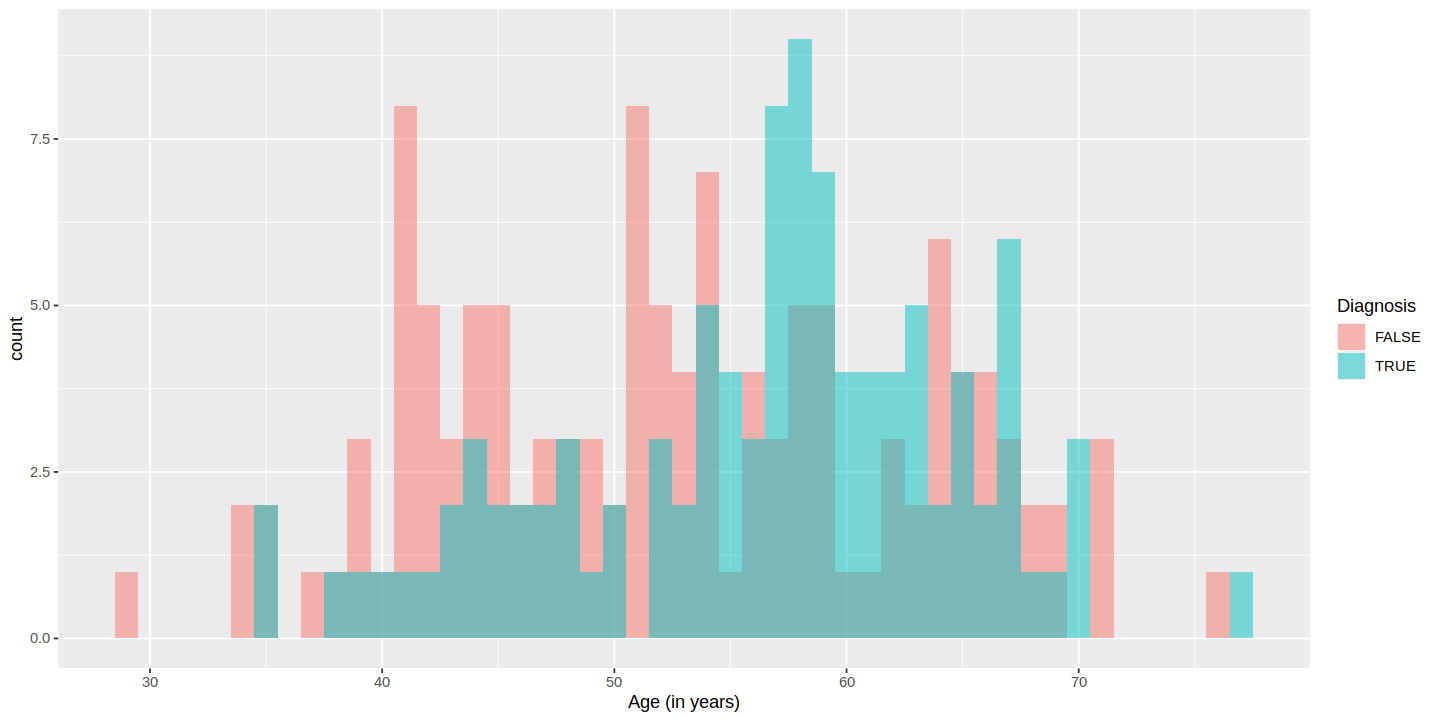

In [12]:
set.seed(1)

#plotting the training data
plot2 <- ggplot(heart_training, aes(x = age, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 1) +
    labs(x = "Age (in years)", fill = "Diagnosis")
plot2

**Figure 7:** A histogram depicting the number of patients of a given age from ~30 to ~80 years old and whether or not they received a heart disease diagnosis. The color blue represents the presence of heart disease and the color red represents no presence of heart disease. Age is on the x-axis (27 years to 77 years) and count is on the y-axis (0 to 10).

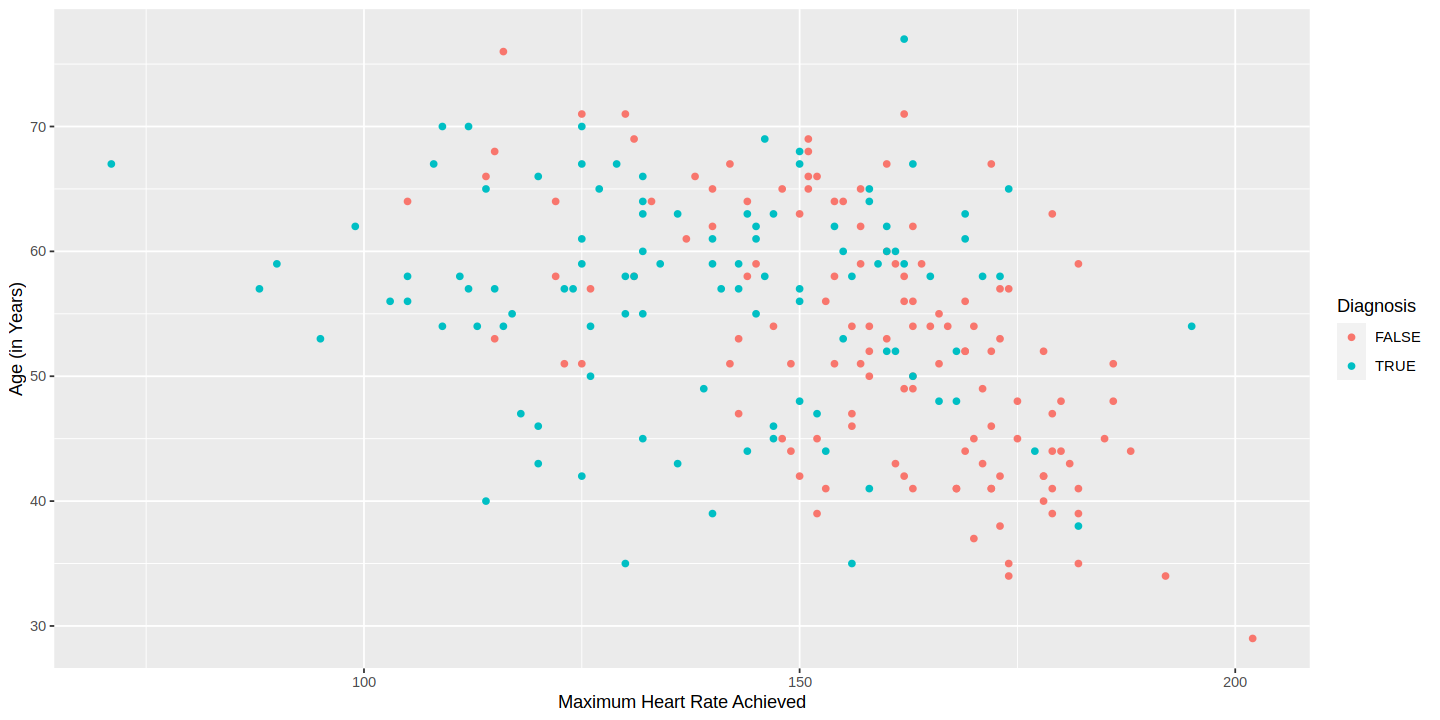

In [13]:
set.seed(1)

# plotting training data
plot3 <- ggplot(heart_training, aes(x = thalach, y = age, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Maximum Heart Rate Achieved", y = "Age (in Years)", color = "Diagnosis")
plot3

**Figure 8:** A scatter plot comparing the maximum heart rate achieved (75 to 215) and patient age (27 years to 77 years) and whether or not they received a heart disease diagnosis. The color blue represents the presence of heart disease and the color red represents no presence of heart disease. Maximum heart rate achieved is on the x-axis (75 to 215) and age is on the y-axis (27 years to 77 years).

### Finding Best K Value

#### Creating a Model

In [14]:
set.seed(1)

# K-nearest neighbors model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# standardizing the data
heart_recipe <- recipe(diagnosis ~ thalach + age, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_scale(all_predictors())

# 10 folded-cross validation
heart_vfold <- vfold_cv(heart_training, v = 10, strata = diagnosis)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# creating the workflow and collecting the metrics
knn_result <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

# filtering for accuracy and descending order based off mean
accuracies <- knn_result |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean))
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.7220685,10,0.02036794,Preprocessor1_Model04
41,accuracy,binary,0.7029480,10,0.03062513,Preprocessor1_Model09
21,accuracy,binary,0.7004941,10,0.02402007,Preprocessor1_Model05
31,accuracy,binary,0.6991601,10,0.01706024,Preprocessor1_Model07
11,accuracy,binary,0.6959486,10,0.02949527,Preprocessor1_Model03
51,accuracy,binary,0.6902503,10,0.02477550,Preprocessor1_Model11


**Figure 9:** A table containing the number of neighbors and the mean accuracy for each group of neighbors.

#### Visualizating Accuracy

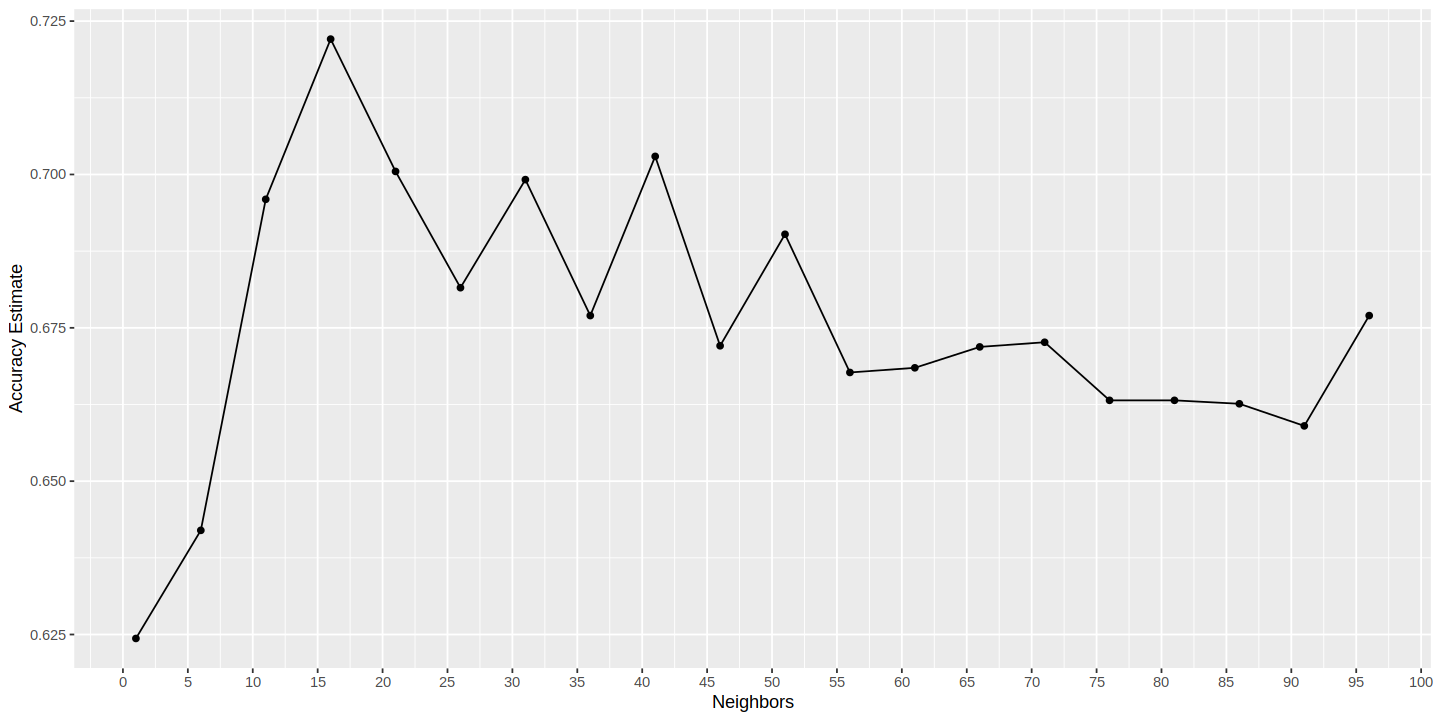

In [15]:
# creating a geom_line plot for accuracy 
accuracy_v_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) 
accuracy_v_k

**Figure 10:** A visualization of Figure 9. Neighbours on the x-axis (from 0 to 100). Accuracy on the y-axis (from 0.625 to 0.725)

### Building the Model

Explain

In [16]:
set.seed(1)
# creating the final specification with our chosen K value
model_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
    set_engine("kknn") |>
    set_mode("classification")
model_spec

# creating the final workflow for our training data
model_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(model_spec) |>
    fit(data = heart_training)
model_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 16
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3274336
Best kernel: rectangular
Best k: 16

### Testing the Classifier - Accuracy and Confusion Matrix

In [17]:
set.seed(1)

# predictions
model_predictions <- predict(model_fit, heart_testing) |>
    bind_cols(heart_testing) 
head(model_predictions) 

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,37,1,3,130,250,0,0,187,0,3.5,3,0,FALSE
FALSE,56,1,2,120,236,0,0,178,0,0.8,1,0,FALSE
FALSE,57,0,4,120,354,0,0,163,1,0.6,1,0,FALSE
TRUE,57,1,4,140,192,0,0,148,0,0.4,2,0,FALSE
TRUE,56,1,3,130,256,1,2,142,1,0.6,2,2,TRUE
FALSE,44,1,2,120,263,0,0,173,0,0.0,1,0,FALSE


**Figure 11:** A table containing the predictions for heart disease diagnosis.

In [18]:
set.seed(1)

# find the accuracy of the predictions
model_metrics <- model_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy")
model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7272727


**Figure 12:** A table containing the accuracy for the predictions for heart disease diagnosis from Figure 11.

In [19]:
set.seed(1)

# confusion matrix
model_conf_mat <- model_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)
model_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE    30   11
     TRUE     10   26

**Figure 13:** A table containing the confusion matrix from our predictions from Figure 11.

## Discussion

### Findings
Based on our testing data, the k-nearest neighbors model correctly predicted the diagnosis of a patient approximately 73% of the time. This suggest that we can predict the diagnosis based on the age and maximum heart rate achieved by the patient, relatively well. When looking at the confusion matrix we can see that the model had about the same level of difficulty predicting either diagnosis. We decided to pick age and maximum heart rate achieved based off of the visualization of data and risk factors identified by medical professionals (1,2).

### Expected Findings vs Actual Findings
We expected that patients that had heart disease would all be older and have lower. Our findings were as expected: patients that are older and have a lower maximum rate achieved were more likely to be diagnosed with heart disease. This is further supported by the scientific community as they note that as someone gets older their maximum heart rate achievable decreases and their likelihood of heart disease increases (1, 2, 3). 

We expected high accuracy for our classifier, anything about 70% was ideal. This was deduced through our visualizations of our predictors. Both of our predictors displayed clustering of data points for each diagnosis state, TRUE or FALSE. This indicated there was a potential relationship between the predictors and heart disease diagnosis. We also expected high accuracy due to the life-endangering nature of this problem. The accuracy of our classifier was ~73%, which was slightly better than predicted. Inaccuracies were likely the result of having a relatively small data set, resulting in less data to train our classifier and less data in our testing set. Additionally, accuracy might be lower because we classified any diagnosis associated with heart disease as having heart disease. These predictors might be associated with a certain severity of heart disease, and requires further investigation.


### Impact of Findings
The impact of these findings could be significant in terms of public health. Understanding how age and maximum heart rate influence heart disease can inform preventive strategies and healthcare policies, ultimately reducing the burden of heart disease in Canada. Having a classification system could make it easier for health care professionals to diagnose and subsequently treat heart disease, freeing up more time to see other patients, leading to better patient outcomes. The accuracy of this predictor is fairly high, however, given the sensitive and potentially life-threatening nature of this issue we recommend using this classifier alongside a professional diagnosis from a physician. 

### Future Questions
These findings may lead to several follow-up questions and research directions, such as:

1. Are there other demographic or lifestyle factors that interact with age and maximum heart rate to influence heart disease risk?
2. How can the knowledge gained be translated into personalized healthcare interventions?
3. Can the dataset be expanded or combined with other sources to provide a more comprehensive understanding of heart disease risk factors?
4. What are the long-term health implications for individuals who are at higher risk due to age and maximum heart rate and how can these be mitigated?

Answering these questions could further advance our understanding of heart disease and guide efforts to prevent and manage it effectively.

## References

1.https://www.cdc.gov/heartdisease/about.htm#:~:text=What%20is%20heart%20disease%3F,can%20cause%20a%20heart%20attack 

2. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging

3. https://www150.statcan.gc.ca/n1/daily-quotidien/230828/dq230828b-eng.htm

4. Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.